# Monty Hall problem

## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 

In this exercise, we're simulating the Monty Hall problem multiple times. Imagine a TV show with three doors: behind one is a car, and behind the other two are goats. The player selects a door, and then the host opens one of the other two doors, revealing a goat. Now, we have three types of players with different strategies:

- **Conservative**: They choose to stick with their initial door.
- **Switcher**: They decide to change their chosen door after one is revealed.
- **Newcomer**: They're unaware of previous moves and randomly select one of the two remaining doors.

The question is, which type of player is more likely to win?


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Function that simulates the Monty Hall Problem

In [2]:
def MontyHall(n_doors, player):
    # I define the doors as a boolean array of False
    doors = [False] * n_doors

    # I extract a random index and put the car behind that door (it becomes True)
    random_index = random.randint(0, n_doors-1)
    doors[random_index] = True

    # The player makes a choice: he chooses one of the doors
    player_choice = random.randint(0, n_doors-1)

    # If he chooses a door with the goat (False), the presenter opens the other door with the goat behind
    if doors[player_choice] == False:
        remaining_doors = [i for i in range(n_doors) if doors[i]==True]
        door_closed = random.choice(remaining_doors)

    # Ih he chooses the door with the car, a random door between the remaining ones
    else:
        remaining_doors = [i for i in range(n_doors) if i != player_choice]
        door_closed = random.choice(remaining_doors)

    # Now, each player makes a different choice!
    if player == 'Conservative':
        player_choice = player_choice

    elif player == 'Switcher':
        new_door_options = [i for i in range(n_doors) if i == door_closed]
        player_choice = random.choice(new_door_options)

    elif player == 'Newcomer':
        doors_available = [i for  i in range(n_doors) if i == door_closed or i == player_choice] 
        player_choice = random.choice(doors_available)
            
    return doors[player_choice]    

### Parameters of the simulation

In [3]:
N = 10000
n_doors = 3

In [4]:
my_players = ['Conservative', 'Switcher', 'Newcomer']
# Dictionary with keys (Players) and number of Wins!
wins_dict = {}

for player in my_players:
    wins = [False] * N
    for i in range(0, N-1):
        wins[i] = MontyHall(n_doors, player)  # Assicurati di passare il nome del giocatore
    n_victories = wins.count(True)
    wins_dict[player] = n_victories

print(wins_dict)

{'Conservative': 3402, 'Switcher': 6691, 'Newcomer': 4970}


In [5]:
prob_dict = {}
for player in my_players:
    prob_dict[player] = wins_dict[player]/N

print(prob_dict)

{'Conservative': 0.3402, 'Switcher': 0.6691, 'Newcomer': 0.497}


### Theoretical Probabilities**
- **Conservative**: $P_{cons} = \frac{1}{N_{doors}} = \frac{1}{3}$.
- **Switcher**: the probability of winning by switching doors is exactly the same as the probability of having initially chosen a goat $\left( \frac{2}{3} \right)$.
- **Outcomer**: $\frac{1}{2}$.

In [6]:
p_cons = 1/3
p_swit = 2/3
p_outc = 1/2

Text(0.5, 1.0, 'Winning probability for Each Player Type')

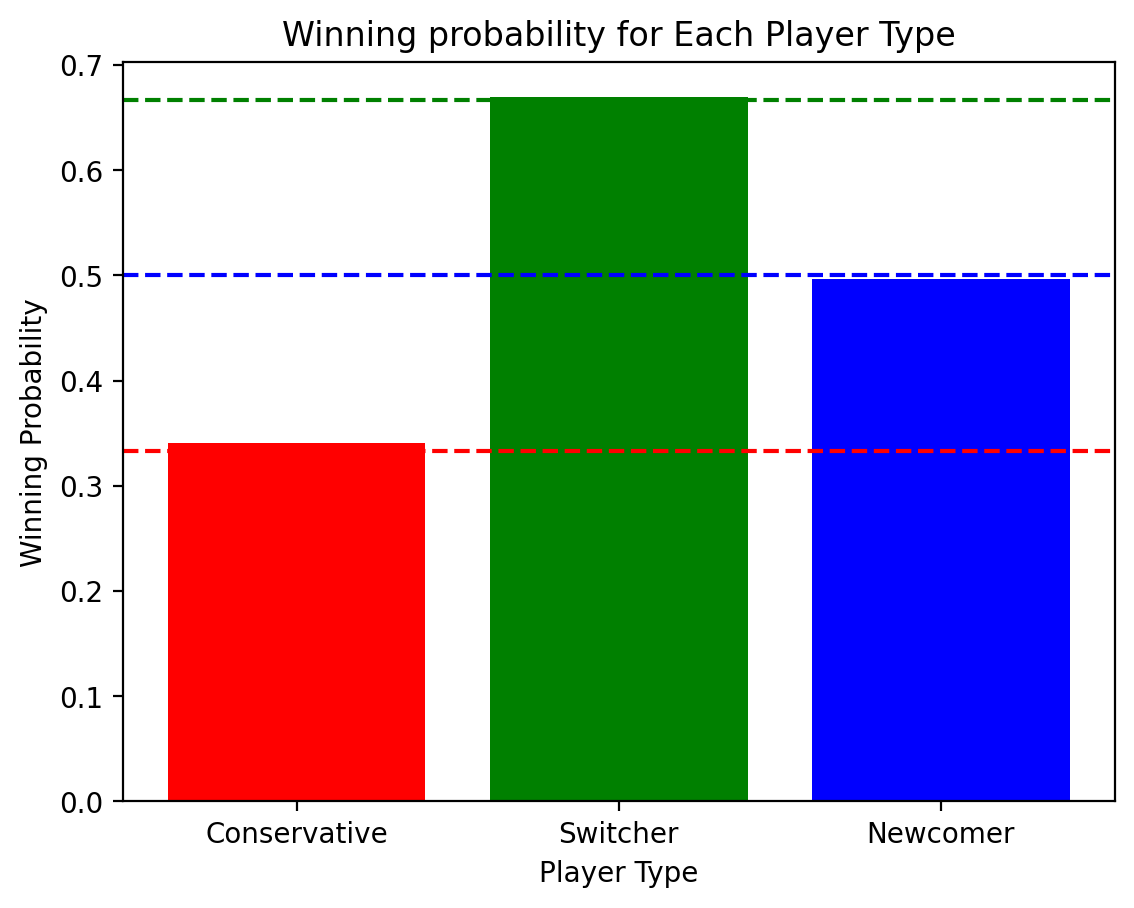

In [7]:
players = list(prob_dict.keys())
probabilities = list(prob_dict.values())
colors = ['red', 'green', 'blue']

plt.bar(players, probabilities, color=colors)
plt.axhline(y = p_cons, color='red'  , linestyle='--')
plt.axhline(y = p_swit, color='green', linestyle='--')
plt.axhline(y = p_outc, color='blue' , linestyle='--')

plt.xlabel('Player Type')
plt.ylabel('Winning Probability')
plt.title('Winning probability for Each Player Type')

The $\textbf{Switcher}$ is the player who has more chances to win!!

## Try with more doors

In [8]:
N_doors = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N_doors = np.array(N_doors)
N_simulations = 1000

prob_list = []

for n in N_doors:
    dict_name = f'{n}_dict'
    locals()[dict_name] = {} 
    
    for player in my_players:
        wins = [False]*N_simulations
        
        for i in range(N_simulations):
            wins[i] = MontyHall(n, player)
            
        victories = wins.count(True)
        locals()[dict_name][player] = victories/N_simulations
     
    prob_list.append(locals()[dict_name])

In [9]:
prob_list

[{'Conservative': 0.317, 'Switcher': 0.653, 'Newcomer': 0.521},
 {'Conservative': 0.098, 'Switcher': 0.887, 'Newcomer': 0.512},
 {'Conservative': 0.048, 'Switcher': 0.955, 'Newcomer': 0.499},
 {'Conservative': 0.043, 'Switcher': 0.971, 'Newcomer': 0.482},
 {'Conservative': 0.026, 'Switcher': 0.979, 'Newcomer': 0.474},
 {'Conservative': 0.014, 'Switcher': 0.986, 'Newcomer': 0.51},
 {'Conservative': 0.014, 'Switcher': 0.978, 'Newcomer': 0.521},
 {'Conservative': 0.011, 'Switcher': 0.986, 'Newcomer': 0.492},
 {'Conservative': 0.012, 'Switcher': 0.989, 'Newcomer': 0.507},
 {'Conservative': 0.005, 'Switcher': 0.993, 'Newcomer': 0.524},
 {'Conservative': 0.008, 'Switcher': 0.992, 'Newcomer': 0.5}]

In [10]:
Conservative_prob = np.array([entry['Conservative'] for entry in prob_list])
Switcher_prob     = np.array([entry['Switcher']     for entry in prob_list])
Newcomer_prob     = np.array([entry['Newcomer']     for entry in prob_list])

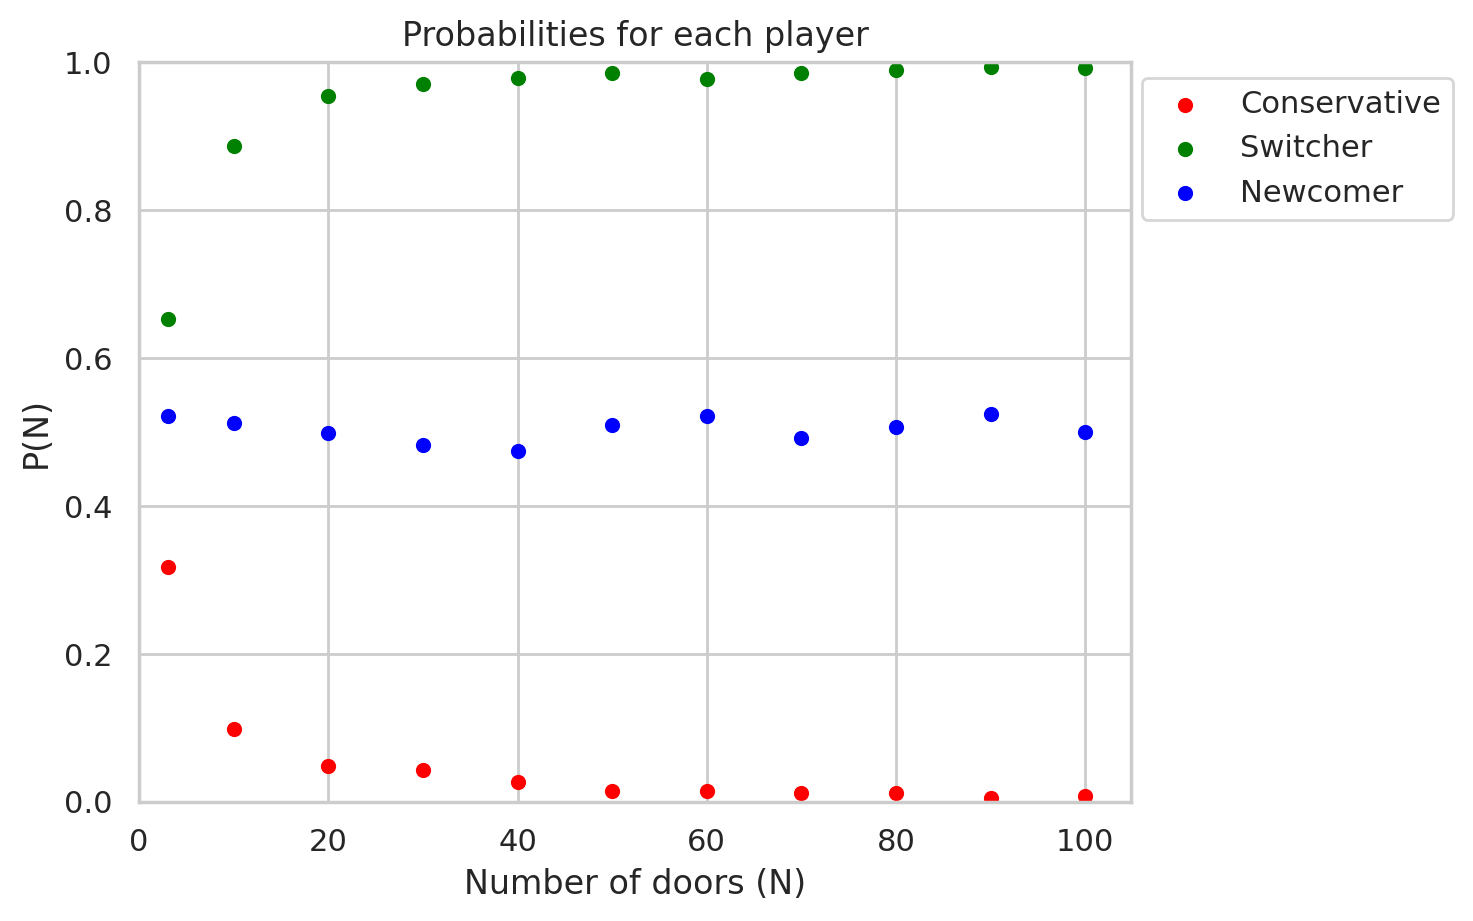

In [11]:
sns.set(style='whitegrid')

plt.scatter(N_doors, Conservative_prob, marker='o', s=20, color='red',   label='Conservative')
plt.scatter(N_doors, Switcher_prob,     marker='o', s=20, color='green', label='Switcher')
plt.scatter(N_doors, Newcomer_prob,     marker='o', s=20, color='blue',  label='Newcomer')
plt.title('Probabilities for each player')
plt.xlabel('Number of doors (N)')
plt.ylabel('P(N)')
plt.xlim(0)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(1.34, 1))

The **switcher** has more chance to win!